In [1]:

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from imp import reload

import seaborn as sns
sns.set_style("dark")

%matplotlib inline

img_base_path = r"../image_data/DIP3E_Original_Images_CH10"

# 基于边缘突变的检测

## 基于一阶差分和二阶差分比较

In [3]:
 source_data = pd.DataFrame([5,5,4,3,2,1,0,0,0,0,6,0,0,0,1,3])

In [5]:
first_diff = source_data.diff()
second_diff = first_diff.diff()

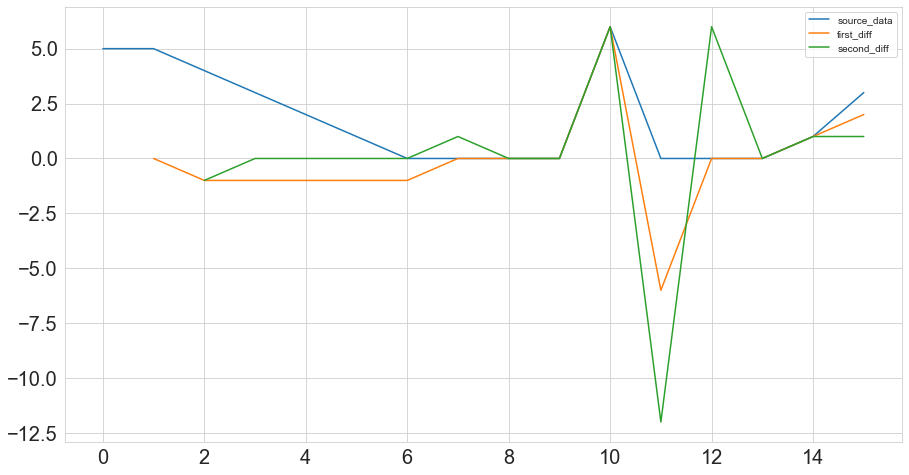

In [21]:
sns.set_style("whitegrid")

data_df = pd.concat([source_data,first_diff,second_diff],axis = 1)
data_df.columns = ["source_data","first_diff","second_diff"]
data_df.plot(figsize=(15,8),fontsize = 20,)

### 孤立点检测

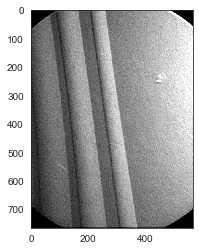

In [35]:
image_path = os.path.join(img_base_path,r"Fig1004(b)(turbine_blade_black_dot).tif")
img = Image.open(image_path)
img = np.asarray(img)
img = img.astype(np.uint8)

plt.imshow(img,cmap="gray")

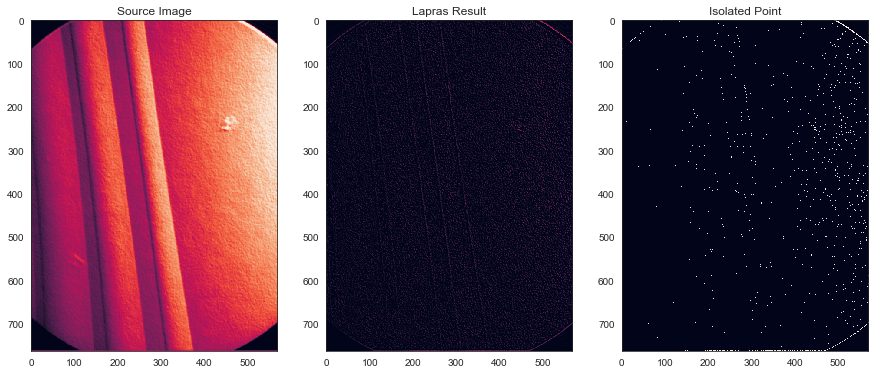

In [45]:

lapras_filter = np.asarray([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])

tmp_img = cv2.filter2D(img,-1,lapras_filter)
r_img = (tmp_img > np.percentile(tmp_img,99)).astype(np.int)

_,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,8))
ax1.imshow(img)
ax1.set_title("Source Image")
ax2.imshow(tmp_img)
ax2.set_title("Lapras Result")
ax3.imshow(r_img)
ax3.set_title("Isolated Point")

plt.show()

### 线检测

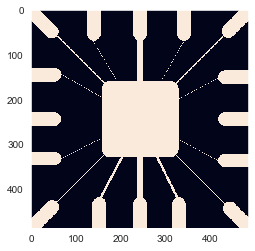

In [6]:
img_path = os.path.join(img_base_path,"Fig1005(a)(wirebond_mask).tif")
img = Image.open(img_path)
img = np.asarray(img)
plt.imshow(img)

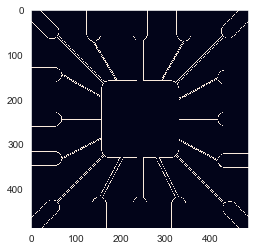

In [7]:
lapras_filter = np.asarray([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])

tmp_img = cv2.filter2D(img,-1,lapras_filter)
plt.imshow(tmp_img)

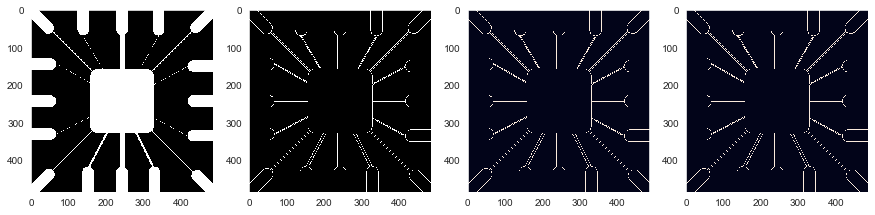

In [11]:
_,axes = plt.subplots(1,4,figsize=(15,8))

axes[0].imshow(img,cmap="gray")
axes[1].imshow(tmp_img,cmap = "gray")
axes[2].imshow(np.abs(tmp_img))
axes[3].imshow(tmp_img > 0)

plt.show()

### 基本检测模型(Sobel)

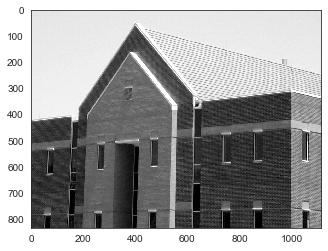

In [3]:
sns.set_style("white")

image_path = os.path.join(img_base_path,"Fig1016(a)(building_original).tif")
image = Image.open(image_path)
image = np.asarray(image)
plt.imshow(image,cmap="gray")

Text(0.5, 1.0, 'Grad X + Grad Y')

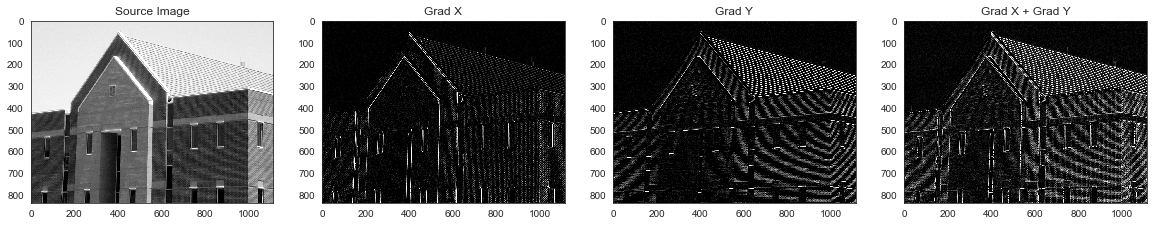

In [16]:
grad_x = cv2.Sobel(image,-1,1,0)
grad_y = cv2.Sobel(image,-1,0,1)

_,axes = plt.subplots(1,4,figsize = (20,8))

axes[0].imshow(image,cmap="gray")
axes[0].set_title("Source Image")

axes[1].imshow(np.abs(grad_x),cmap="gray")
axes[1].set_title("Grad X")

axes[2].imshow(np.abs(grad_y),cmap="gray")
axes[2].set_title("Grad Y")

axes[3].imshow(np.abs(grad_x) + np.abs(grad_y),cmap="gray")
axes[3].set_title("Grad X + Grad Y")

### Sobel滤波（先用平滑处理）

Text(0.5, 1.0, 'Grad X + Grad Y')

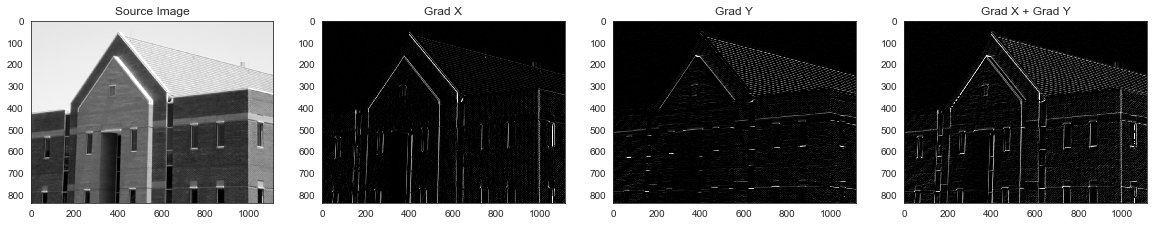

In [19]:
blur_image = cv2.blur(image,(5,5))

grad_x = cv2.Sobel(blur_image,-1,1,0)
grad_y = cv2.Sobel(blur_image,-1,0,1)

_,axes = plt.subplots(1,4,figsize = (20,8))

axes[0].imshow(blur_image,cmap="gray")
axes[0].set_title("Source Image")

axes[1].imshow(np.abs(grad_x),cmap="gray")
axes[1].set_title("Grad X")

axes[2].imshow(np.abs(grad_y),cmap="gray")
axes[2].set_title("Grad Y")

axes[3].imshow(np.abs(grad_x) + np.abs(grad_y),cmap="gray")
axes[3].set_title("Grad X + Grad Y")

## Marr-Hildreth边缘检测

### 原图

(834, 1114)


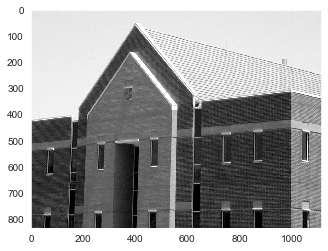

In [6]:
img_path = os.path.join(img_base_path,r"Fig1016(a)(building_original).tif")

img = Image.open(img_path)
img = np.asarray(img)
print(img.shape)

plt.imshow(img,cmap="gray")

### 

### 高斯模糊

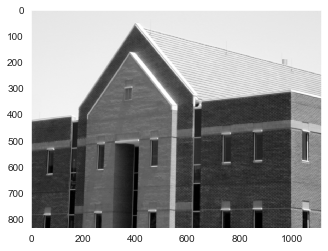

In [17]:
tmp_img = cv2.GaussianBlur(img,(9,9),1.5)
plt.imshow(tmp_img,cmap = "gray")

### 拉普拉斯变换

变换前的结果


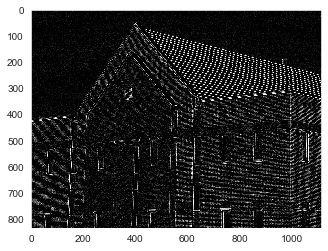

变换后的结果


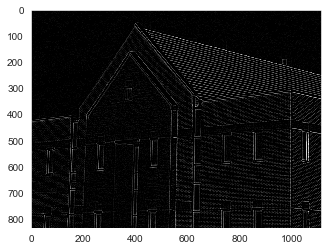

In [25]:
print("变换前的结果")
plt.imshow(cv2.Laplacian(img,ddepth = -1,ksize = 3),cmap = "gray")
plt.show()

print("变换后的结果")
plt.imshow(cv2.Laplacian(tmp_img,ddepth = -1,ksize = 3),cmap = "gray")
plt.show()

## 霍夫变换

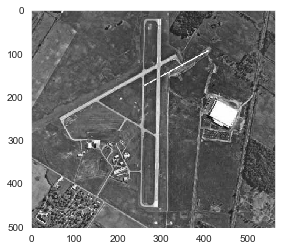

In [5]:
img_path = os.path.join(img_base_path,r"Fig1034(a)(marion_airport).tif")
img = Image.open(img_path)
img = np.asarray(img)

plt.imshow(img,cmap="gray")

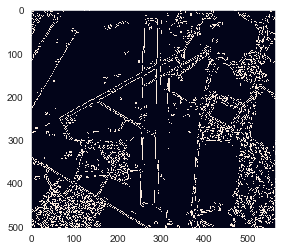

In [40]:
canny_img = cv2.Canny(img,threshold1 = 100,threshold2 = 200,apertureSize=3)
hough_lines = cv2.HoughLines(canny_img,rho=1.,theta = np.pi / 180.,threshold = 100)

plt.imshow(canny_img)

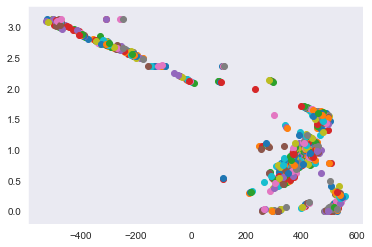

In [43]:
for line in hough_lines:
    plt.scatter(line[0][0],line[0][1])
#     ax = plt.subplot(111,projection = 'polar')
#     ax.plot(line[0][1],line[0][0],linewidth = 3,color = "r")
#     break
    
plt.show()
# plt.imshow(canny_img)